In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Logistic Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

logreg_params = {
    'solver': ['saga', 'lbfgs'],
    'max_iter': [100, 200],
    'multi_class': ['multinomial', 'ovr']
}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=3, n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)
y_pred = logreg_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression (GridSearchCV) Best Params: {logreg_grid.best_params_}")
print(f"Logistic Regression (GridSearchCV) Accuracy: {accuracy*100:.2f}%\n")

# Random Forest Classifier with GridSearchCV
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
rf_y_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest (GridSearchCV) Best Params: {rf_grid.best_params_}")
print(f"Random Forest (GridSearchCV) Accuracy: {rf_accuracy*100:.2f}%\n")

# Support Vector Classifier with GridSearchCV
svc_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
svc_grid = GridSearchCV(SVC(random_state=42), svc_params, cv=3, n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)
svc_y_pred = svc_grid.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f"SVC (GridSearchCV) Best Params: {svc_grid.best_params_}")
print(f"SVC (GridSearchCV) Accuracy: {svc_accuracy*100:.2f}%")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\abul4\miniforge3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\abul4\miniforge3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (GridSearchCV) Best Params: {'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Logistic Regression (GridSearchCV) Accuracy: 96.94%

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest (GridSearchCV) Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (GridSearchCV) Accuracy: 97.22%

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random Forest (GridSearchCV) Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (GridSearchCV) Accuracy: 97.22%

Fitting 3 folds for each of 6 candidates, totalling 18 fits
SVC (GridSearchCV) Best Params: {'C': 10, 'kernel': 'rbf'}
SVC (GridSearchCV) Accuracy: 98.61%
SVC (GridSearchCV) Best Params: {'C': 10, 'kernel': 'rbf'}
SVC (GridSearchCV) Accuracy: 98.61%


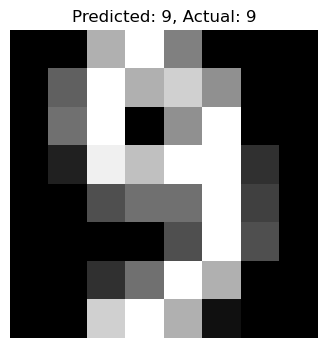

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_test[1].reshape(8,8), cmap='gray')
plt.title(f"Predicted: {y_pred[1]}, Actual: {y_test[1]}")
plt.axis('off')
plt.show()